In [21]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
import seaborn as sns
import weakref
import matplotlib.pyplot as plt
import scipy.stats
sns.set_style("whitegrid")

In [22]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%autoreload 2

In [61]:
data1=np.load('./output_compiled1.npy')
data2=np.load('./output_compiled.npy')
data=np.concatenate((data1,data2),axis=4)
# data=np.load('./output_compiled1.npy')

In [62]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.2, 3)  # 3
lambda_std = np.linspace(0.0, 0.2, num=3)  # 3
delta = np.array([1.0])
beta = np.linspace(0.1, 0.5, num=17)  # 17
r = beta/(1-beta)
alpha = np.linspace(0.5, 1.0, num=2)  # 2
num_rep = 50  # number of repeats
gr_corr_a=np.linspace(0.0,0.9,num=10)  # 10
# # should give 153000 repeats. Run with 1500 job array.
# # should take around 15 hours. 65315013

# par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 16, 'delta': delta[0], 'lambda': l[0]}
# X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep, len(gr_corr_a)]
# observables = ['MD corr', 'MD corr p val', 'GR num', 'GR vol', 'td_std', 't_av', 'vb_std', 'v_av', 'linear slope']
# a_shape = X+[num_celltypes, len(observables)]  # this is the shape of the array that we are appending our results to

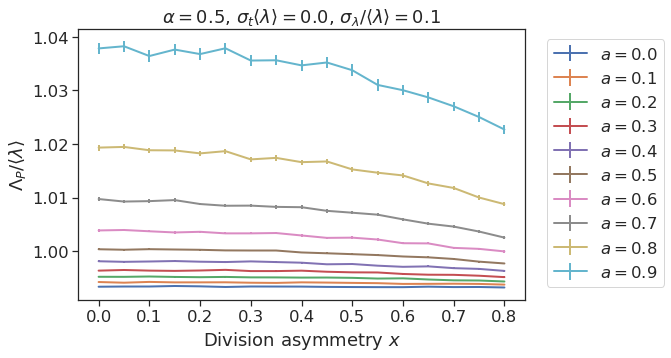

In [63]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=1.5)
sns.set_style("ticks")
i_t = 0
i_l = 1
i_alpha = 0
xv = 1.0-2.0*beta
for i_a in range(len(gr_corr_a)):
    yv = np.mean(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)
    yv_std = np.std(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)/np.sqrt(num_rep)
#     plt.plot(xv,yv,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=3.0)
#     plt.fill_between(xv,yv-yv_std,yv+yv_std,alpha=0.5)
    plt.errorbar(xv,yv,yerr=yv_std,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=2.0)
plt.legend(loc=[1.05,0.05])
plt.ylabel(r'$\Lambda_P/\langle \lambda \rangle$')
plt.xlabel(r'Division asymmetry $x$')
plt.title(r'$\alpha={0}$, $\sigma_t\langle \lambda\rangle={1}$, $\sigma_\lambda/\langle \lambda\rangle={2}$'.format(alpha[i_alpha],td_std[i_t],lambda_std[i_l]))
plt.show()
fig.savefig('./growth_corr_fig_0.eps',bbox_inches='tight',dpi=300)

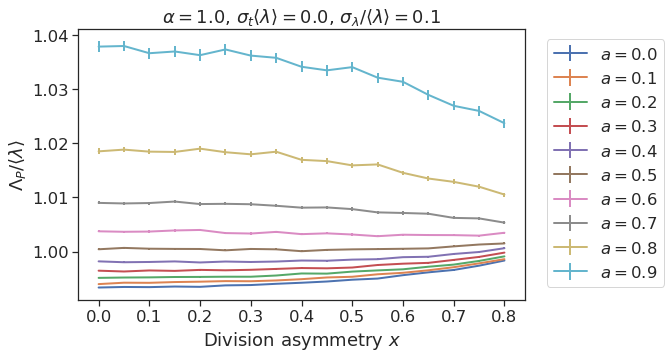

In [64]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=1.5)
sns.set_style("ticks")
i_t = 0
i_l = 1
i_alpha = 1
xv = 1.0-2.0*beta
for i_a in range(len(gr_corr_a)):
    yv = np.mean(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)
    yv_std = np.std(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)/np.sqrt(num_rep)
#     plt.plot(xv,yv,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=3.0)
#     plt.fill_between(xv,yv-yv_std,yv+yv_std,alpha=0.5)
    plt.errorbar(xv,yv,yerr=yv_std,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=2.0)
plt.legend(loc=[1.05,0.05])
plt.ylabel(r'$\Lambda_P/\langle \lambda \rangle$')
plt.xlabel(r'Division asymmetry $x$')
plt.title(r'$\alpha={0}$, $\sigma_t\langle \lambda\rangle={1}$, $\sigma_\lambda/\langle \lambda\rangle={2}$'.format(alpha[i_alpha],td_std[i_t],lambda_std[i_l]))
plt.show()
fig.savefig('./growth_corr_fig_1.eps',bbox_inches='tight',dpi=300)

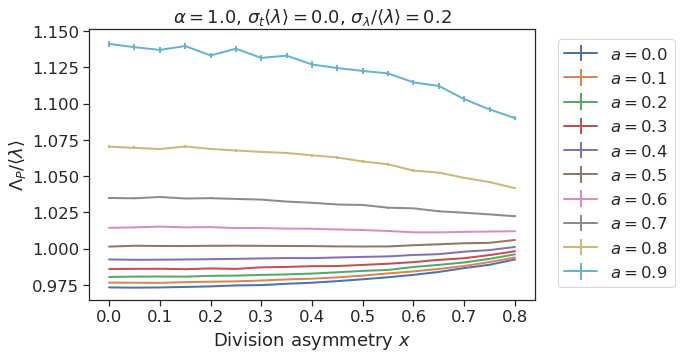

In [65]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=1.5)
sns.set_style("ticks")
i_t = 0
i_l = 2
i_alpha = 1
xv = 1.0-2.0*beta
for i_a in range(len(gr_corr_a)):
    yv = np.mean(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)
    yv_std = np.std(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)/np.sqrt(num_rep)
#     plt.plot(xv,yv,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=3.0)
#     plt.fill_between(xv,yv-yv_std,yv+yv_std,alpha=0.5)
    plt.errorbar(xv,yv,yerr=yv_std,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=2.0)
plt.legend(loc=[1.05,0.05])
plt.ylabel(r'$\Lambda_P/\langle \lambda \rangle$')
plt.xlabel(r'Division asymmetry $x$')

plt.title(r'$\alpha={0}$, $\sigma_t\langle \lambda\rangle={1}$, $\sigma_\lambda/\langle \lambda\rangle={2}$'.format(alpha[i_alpha],td_std[i_t],lambda_std[i_l]))
plt.show()
fig.savefig('./growth_corr_fig_2.eps',bbox_inches='tight',dpi=300)

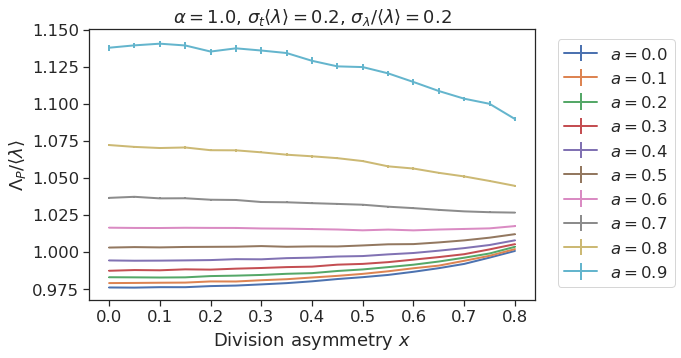

In [66]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=1.5)
sns.set_style("ticks")
i_t = 2
i_l = 2
i_alpha = 1
xv = 1.0-2.0*beta
for i_a in range(len(gr_corr_a)):
    yv = np.mean(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)
    yv_std = np.std(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)/np.sqrt(num_rep)
#     plt.plot(xv,yv,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=3.0)
#     plt.fill_between(xv,yv-yv_std,yv+yv_std,alpha=0.5)
    plt.errorbar(xv,yv,yerr=yv_std,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=2.0)
plt.legend(loc=[1.05,0.05])
plt.ylabel(r'$\Lambda_P/\langle \lambda \rangle$')
plt.xlabel(r'Division asymmetry $x$')

plt.title(r'$\alpha={0}$, $\sigma_t\langle \lambda\rangle={1}$, $\sigma_\lambda/\langle \lambda\rangle={2}$'.format(alpha[i_alpha],td_std[i_t],lambda_std[i_l]))
plt.show()
fig.savefig('./growth_corr_fig_3.eps',bbox_inches='tight',dpi=300)

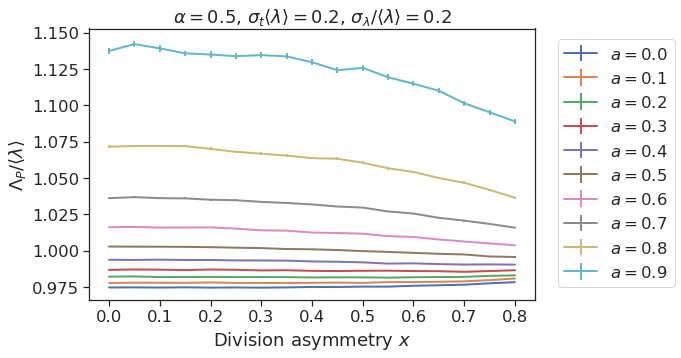

In [67]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=1.5)
sns.set_style("ticks")
i_t = 2
i_l = 2
i_alpha = 0
xv = 1.0-2.0*beta
for i_a in range(len(gr_corr_a)):
    yv = np.mean(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)
    yv_std = np.std(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)/np.sqrt(num_rep)
#     plt.plot(xv,yv,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=3.0)
#     plt.fill_between(xv,yv-yv_std,yv+yv_std,alpha=0.5)
    plt.errorbar(xv,yv,yerr=yv_std,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=2.0)
plt.legend(loc=[1.05,0.05])
plt.ylabel(r'$\Lambda_P/\langle \lambda \rangle$')
plt.xlabel(r'Division asymmetry $x$')

plt.title(r'$\alpha={0}$, $\sigma_t\langle \lambda\rangle={1}$, $\sigma_\lambda/\langle \lambda\rangle={2}$'.format(alpha[i_alpha],td_std[i_t],lambda_std[i_l]))
plt.show()
fig.savefig('./growth_corr_fig_4.eps',bbox_inches='tight',dpi=300)

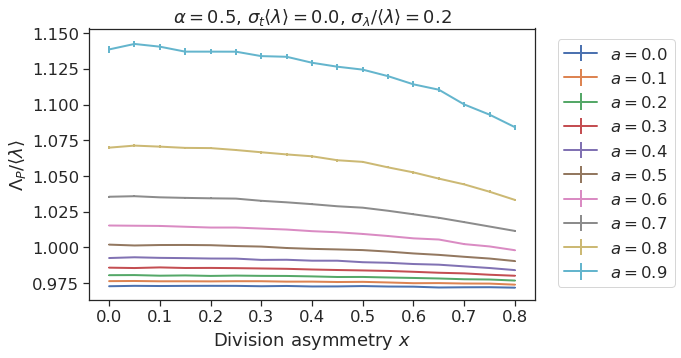

In [68]:
fig=plt.figure(figsize=[8,5])
sns.set(font_scale=1.5)
sns.set_style("ticks")
i_t = 0
i_l = 2
i_alpha = 0
xv = 1.0-2.0*beta
for i_a in range(len(gr_corr_a)):
    yv = np.mean(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)
    yv_std = np.std(data[i_t,i_l,:,i_alpha,:,i_a,2,3],axis=1)/np.sqrt(num_rep)
#     plt.plot(xv,yv,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=3.0)
#     plt.fill_between(xv,yv-yv_std,yv+yv_std,alpha=0.5)
    plt.errorbar(xv,yv,yerr=yv_std,label=r'$a={0}$'.format(gr_corr_a[i_a]),linewidth=2.0)
plt.legend(loc=[1.05,0.05])
plt.ylabel(r'$\Lambda_P/\langle \lambda \rangle$')
plt.xlabel(r'Division asymmetry $x$')

plt.title(r'$\alpha={0}$, $\sigma_t\langle \lambda\rangle={1}$, $\sigma_\lambda/\langle \lambda\rangle={2}$'.format(alpha[i_alpha],td_std[i_t],lambda_std[i_l]))
plt.show()
fig.savefig('./growth_corr_fig_5.eps',bbox_inches='tight',dpi=300)

In [10]:
lambda_std=np.linspace(0.01,0.1,10)
gr=[]
for ind1 in range(len(lambda_std)):
    par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 16, 'delta': 1.0}
    par_vals['td_std'] = 0.1
    par_vals['lambda_std']=lambda_std[ind1]
    par_vals['r']=1.0
    par_vals['alpha']=0.5
    par_vals['a']=0.9
    par_vals['b']=1.0-par_vals['a']
    # running the actual simulation
    init_pop = g.starting_popn(par_vals)
    par_vals['nstep']=500  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    init_pop = g.starting_popn_seeded(c, par_vals)
    par_vals['nstep'] = 900  # now we run this simulation for longer with a better seeded population.
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    temp = scipy.stats.linregress(obs[1][400:], np.log(obs[12][400:]))
    gr.append(temp[0])  # GR vol

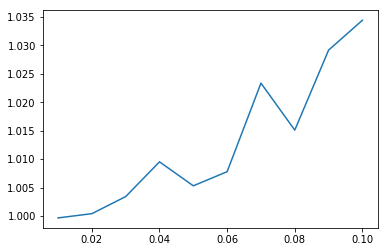

In [14]:
plt.plot(lambda_std,np.asarray(gr))

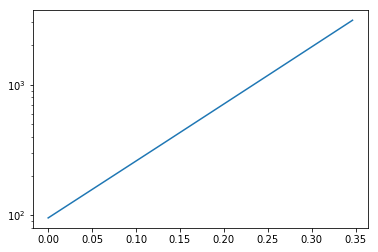

In [8]:
plt.semilogy(obs[1],obs[7])

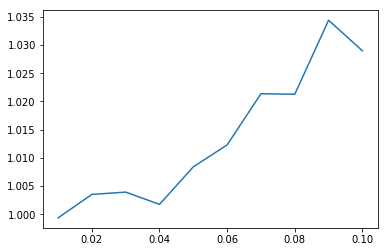

In [23]:
plt.plot(lambda_std,np.asarray(gr)/(par_vals['b']/(1-par_vals['a'])))

In [19]:
temp = scipy.stats.linregress(obs[1][400:], np.log(obs[12][400:]))
gr = temp[0]  # GR vol
print gr/(par_vals['b']/(1-par_vals['a']))
print par_vals

0.9946103407773064
{'td_std': 0.1, 'a': 0.2, 'b': 1.0, 'lambda_std': 0.1, 'v_init': 1.0, 'modeltype': 16, 'r': 1.0, 'delta': 1.0, 'alpha': 1.0, 'dt': 0.01, 'nstep': 900}


In [15]:
temp = scipy.stats.linregress(obs[1][400:], np.log(obs[12][400:]))
gr = temp[0]  # GR vol
print gr
print par_vals

0.9938073055073727
{'td_std': 0.1, 'a': 0.0, 'b': 1.0, 'lambda_std': 0.1, 'v_init': 1.0, 'modeltype': 16, 'r': 1.0, 'delta': 1.0, 'alpha': 1.0, 'dt': 0.01, 'nstep': 900}
